In [1]:
#import all needed library for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import copy

In [2]:
# Load train dataset

train_data= pd.read_csv('train_extend.csv')

#Preview the top rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [3]:
# Load test dataset

test_data= pd.read_csv('test_extend.csv')

#Preview the top rows
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


In [4]:
#Consolidate missing values in Age with wiki data
train_data.iloc[:, 5]= train_data.Age_wiki
train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
test_data.loc[:, 'Age']= test_data.Age_wiki
test_data[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,19.0,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,63.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


In [6]:
#Check for missing numbers

train_data.isnull().sum(), test_data.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              4
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 WikiId           2
 Name_wiki        2
 Age_wiki         4
 Hometown         2
 Boarded          2
 Destination      2
 Lifeboat       546
 Body           804
 Class            2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              3
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 WikiId           3
 Name_wiki        3
 Age_wiki         3
 Hometown         3
 Boarded          3
 Destination      3
 Lifeboat       261
 Body           375
 Class            3
 dtype: int64)

In [7]:
# Replace missing values with the average

train_data['Age'].loc[train_data.Age.isnull()]= train_data['Age'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
# Replace missing values with the average

test_data['Age'].loc[test_data.Age.isnull()]= test_data['Age'].mean()
test_data['Fare'].loc[test_data.Fare.isnull()]= test_data['Fare'].mean()


In [9]:
train_data.isnull().sum(), test_data.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 WikiId           2
 Name_wiki        2
 Age_wiki         4
 Hometown         2
 Boarded          2
 Destination      2
 Lifeboat       546
 Body           804
 Class            2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 WikiId           3
 Name_wiki        3
 Age_wiki         3
 Hometown         3
 Boarded          3
 Destination      3
 Lifeboat       261
 Body           375
 Class            3
 dtype: int64)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  WikiId       415 non-null    float64
 12  Name_wiki    415 non-null    object 
 13  Age_wiki     415 non-null    float64
 14  Hometown     415 non-null    object 
 15  Boarded      415 non-null    object 
 16  Destination  415 non-null    object 
 17  Lifeboat     157 non-null    object 
 18  Body         43 non-null     object 
 19  Class   

In [12]:
# Get a list of columns to drop

drop_train = train_data.iloc[:, -9:]
drop_test = test_data.iloc[:, -9:]

In [13]:
train_data.drop(drop_train, axis=1, inplace=True)
test_data.drop(drop_test, axis=1, inplace=True)

In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,19.0,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,63.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
# List of features to drop
cols = ['Name', 'Ticket', 'Cabin'] 
#These features were dropped because I feel they are not needed for the analysis and prediction

train_data.drop(cols, axis=1, inplace=True)
test_data.drop(cols, axis=1, inplace=True)

In [16]:
#Preview ithe our selected features
train_data.head(), train_data.shape


(   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0            1       0.0       3    male  22.0      1      0   7.2500        S
 1            2       1.0       1  female  35.0      1      0  71.2833        C
 2            3       1.0       3  female  26.0      0      0   7.9250        S
 3            4       1.0       1  female  35.0      1      0  53.1000        S
 4            5       0.0       3    male  35.0      0      0   8.0500        S,
 (891, 9))

In [17]:
test_data.head(), test_data.shape

(   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
 0          892       3    male  19.0      0      0   7.8292        Q
 1          893       3  female  47.0      1      0   7.0000        S
 2          894       2    male  63.0      0      0   9.6875        Q
 3          895       3    male  27.0      0      0   8.6625        S
 4          896       3  female  22.0      1      1  12.2875        S,
 (418, 8))

In [18]:
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp     

(None, None)

In [24]:
# copy our original dataframe to be on safe side when performing label encoding
train1= train_data.copy()
test = test_data.copy()


In [29]:
#Encode sex category

encode = {"Sex":{'male':0, 'female':1}}
train1.replace(encode, inplace=True)

train1

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [35]:
#Cast type to category

train1.Sex.astype('category')
train1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,S
1,2,1.0,1,1,35.0,1,0,71.2833,C
2,3,1.0,3,1,26.0,0,0,7.9250,S
3,4,1.0,1,1,35.0,1,0,53.1000,S
4,5,0.0,3,0,35.0,0,0,8.0500,S


In [36]:
#Encode Embarked and cast to type  category

encode1 = {"Embarked":{'S':0, 'C':1, 'Q':2}}

train1.replace(encode1, inplace=True)
train1.Embarked.astype('category')

test.replace(encode1, inplace=True)
test.Embarked.astype('category')

test.replace(encode, inplace=True)
test.Sex.astype('category')

test.head()



,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,19.0,0,0,7.8292,2
1,893,3,1,47.0,1,0,7.0000,0
2,894,2,0,63.0,0,0,9.6875,2
3,895,3,0,27.0,0,0,8.6625,0
4,896,3,1,22.0,1,1,12.2875,0


In [44]:
train1.head(), test.head()


(   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0            1       0.0       3    0  22.0      1      0   7.2500       0.0
 1            2       1.0       1    1  35.0      1      0  71.2833       1.0
 2            3       1.0       3    1  26.0      0      0   7.9250       0.0
 3            4       1.0       1    1  35.0      1      0  53.1000       0.0
 4            5       0.0       3    0  35.0      0      0   8.0500       0.0,
    PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0          892       3    0  19.0      0      0   7.8292         2
 1          893       3    1  47.0      1      0   7.0000         0
 2          894       2    0  63.0      0      0   9.6875         2
 3          895       3    0  27.0      0      0   8.6625         0
 4          896       3    1  22.0      1      1  12.2875         0)

In [50]:
train1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.352413,29.322063,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,13.898750,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200,2.000000


In [53]:
train1.Embarked.fillna('Q', inplace=True )

In [54]:
train1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.322063,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.898750,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200


In [55]:
# Lets get summary of our test data

test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.616241,0.447368,0.392344,35.627188,0.464115
std,120.810458,0.841838,0.481622,13.351936,0.896760,0.981429,55.840500,0.685516
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,37.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,1.000000,67.000000,8.000000,9.000000,512.329200,2.000000


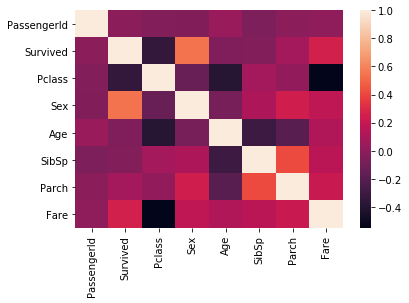

In [59]:
# Correlation
sns.heatmap(train1.corr())

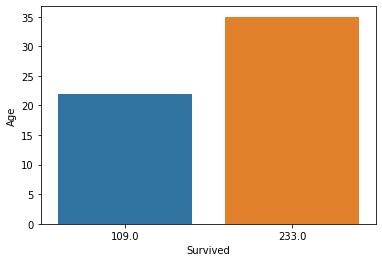

In [72]:
sns.barplot( x=train1.Survived.groupby(train1['Sex']).sum(), y=train1.Age, data= train1)

In [74]:
train1.Survived.groupby(train1['Sex']).sum()

Sex
0    109.0
1    233.0
Name: Survived, dtype: float64

In [75]:
#Preparing model for prediction

X= train1.drop('Survived', axis=1)

y= train1['Survived']

In [78]:
#Model preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#Import LogisticRegression
from sklearn.linear_model import LogisticRegression

#Import XGBoost
import xgboost as xg

(891,)